# Sales Focus

This project involves using linear regression to decide whether an ecommerce company should focus on their website or their mobile app.

## Imports

**Importing required libraries and setting matplotlib inline in Jupyter.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data

The data is from Ecommerce Customers csv file. It has customer information, such as Email, Address, and their color Avatar. It also has the following numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

**Reading in the Ecommerce Customers csv file as a DataFrame called _customers_.**

In [2]:
customers = pd.read_csv("Data/Ecommerce Customers")

**Checking the head of customers, and checking out its info() and describe() methods.**

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

**Using seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent.**

In [9]:
sns.set_palette("coolwarm")
sns.set_style('whitegrid')

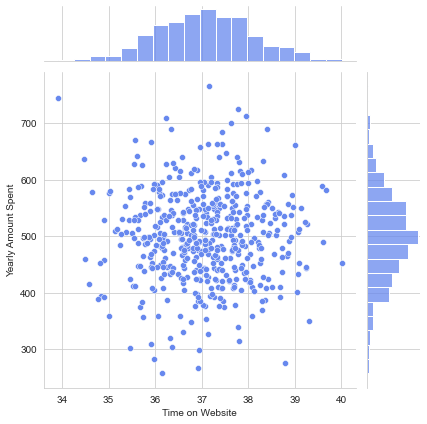

In [10]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

**Doing the same but with the Time on App.**

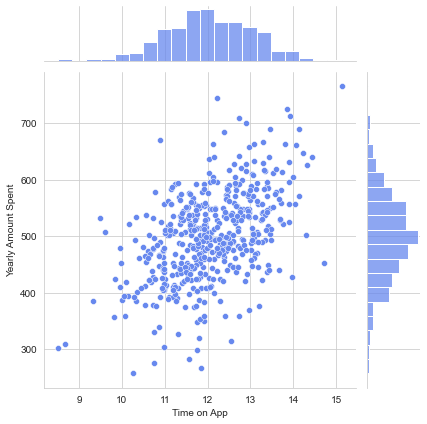

In [11]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

**Using jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

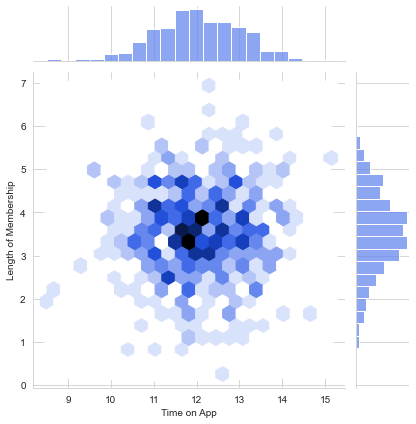

In [12]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)

**Exploring relationships across the entire data set.**

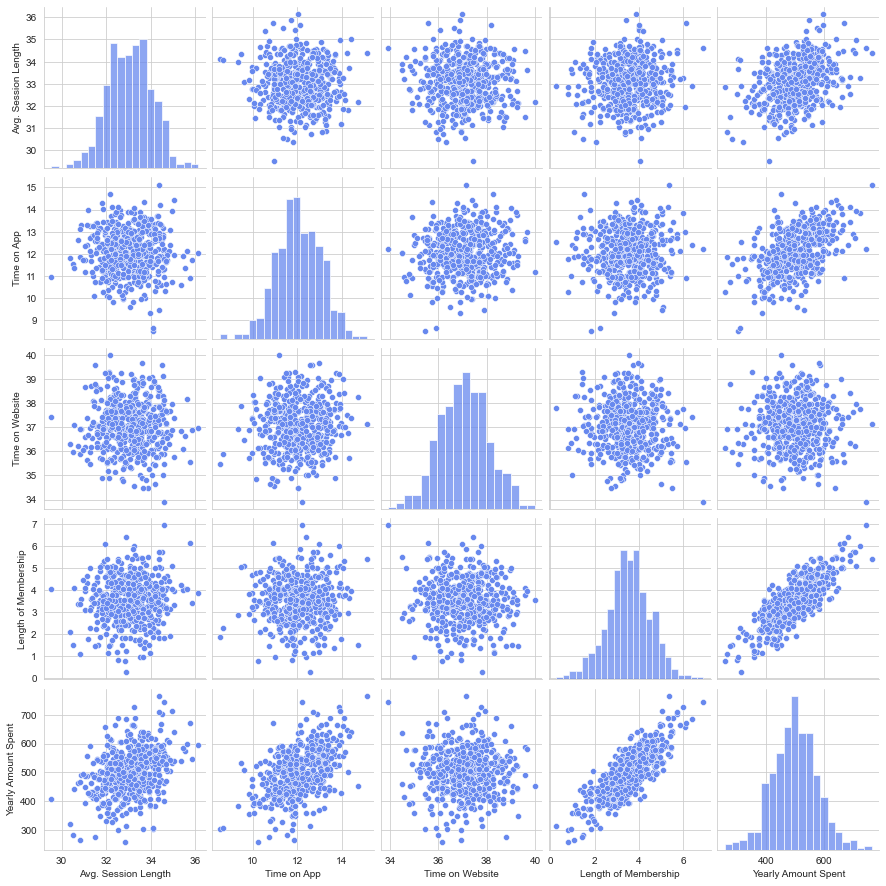

In [13]:
sns.pairplot(customers)

Length of Membership looks to be the most correlated feature with Yearly Amount Spent.

**Creating a linear model plot of Yearly Amount Spent vs. Length of Membership.**

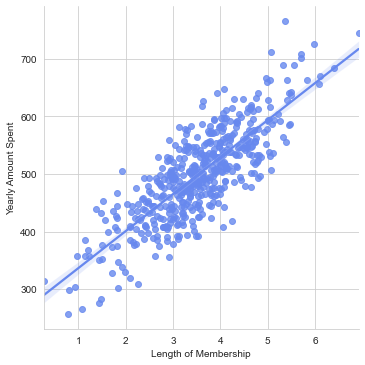

In [14]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

## Training and Testing Data

**Setting a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.**

In [15]:
y = customers['Yearly Amount Spent']

In [16]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets.**

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Training the Model

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression()

**Fitting the model on training data.**

In [22]:
lm.fit(X_train,y_train)

LinearRegression()

**Coefficients of the model:**

In [23]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.62140554 38.74308826  0.30388002 61.73303705]


## Predicting Test Data

**Using lm.predict() to predict off the X_test set of the data.**

In [24]:
predictions = lm.predict( X_test)

**Creating a scatterplot of the real test values versus the predicted values.**

Text(0, 0.5, 'Predicted Y')

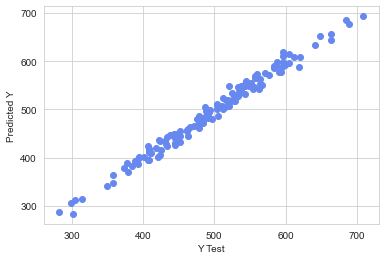

In [25]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

**Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.**

In [26]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.881881296500088
MSE: 96.77769220964267
RMSE: 9.837565359866366


## Residuals

**Plotting a histogram of the residuals to verify normal distribution.**

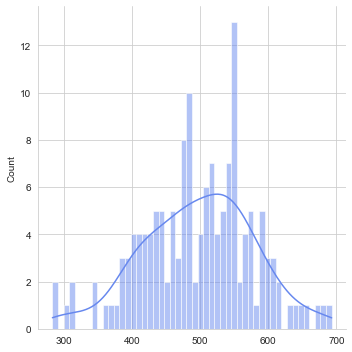

In [27]:
sns.displot(data=y_test,x=predictions,bins=50,kde=True);

## Conclusion

In [28]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.621406
Time on App,38.743088
Time on Website,0.303880
Length of Membership,61.733037


**Interpreting the coefficients:**

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.62 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.74 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.30 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.73 total dollars spent**.

**Suggestions**


There are two possible ways to go about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. The  final decison depends on other factors of the company itself.